# ASTROPI CSV ANALYSIS

## Loading csv file

In [1]:
! git clone https://github.com/giamby3000/RedsTeam_AstroPi22.git

fatal: destination path 'RedsTeam_AstroPi22' already exists and is not an empty directory.


In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib widget
import matplotlib.pyplot as plt

import pandas as pd
prova = pd.read_csv('RedsTeam_AstroPi22/HeaderLog.csv')

## Exploring

In [3]:
prova.columns

Index(['Date/time', 'x', 'y', 'z', 'Total g', 'Elevation (Km)', 'g ValorMedio',
       'MotionDetected', 'Fastmode', 'FastmodeCounter'],
      dtype='object')

In [4]:
prova['MotionDetected'].value_counts()

False    39012
True     11796
Name: MotionDetected, dtype: int64

In [5]:
prova['Fastmode'].value_counts()

False    50758
True        50
Name: Fastmode, dtype: int64

## Plotting

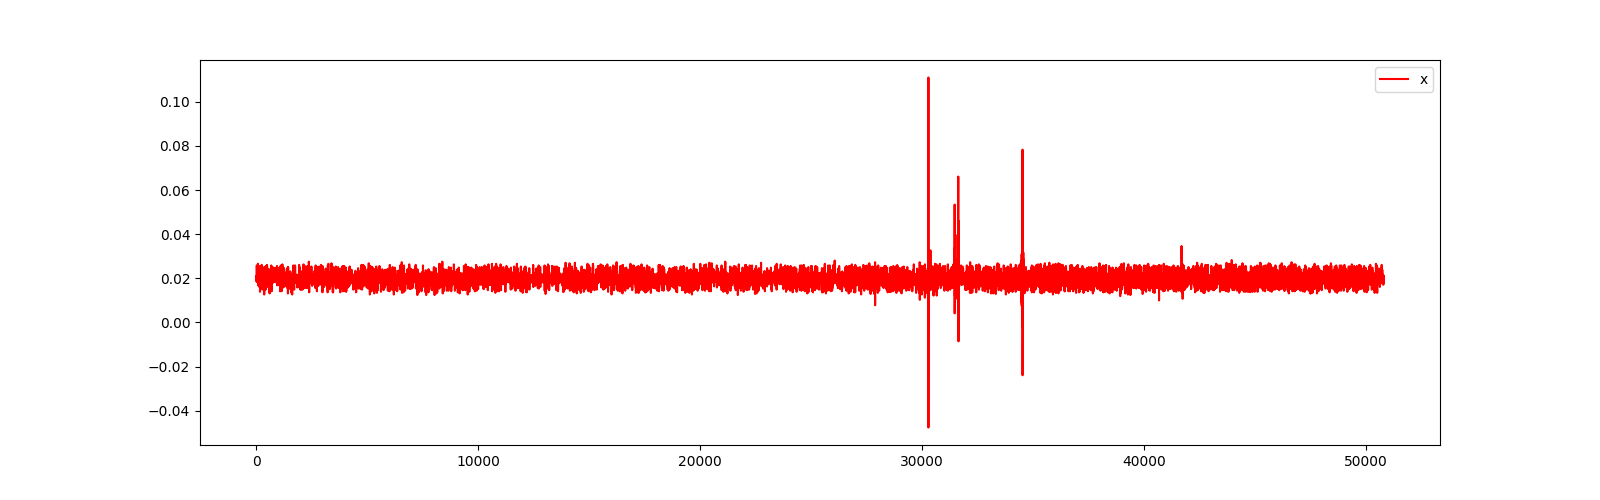

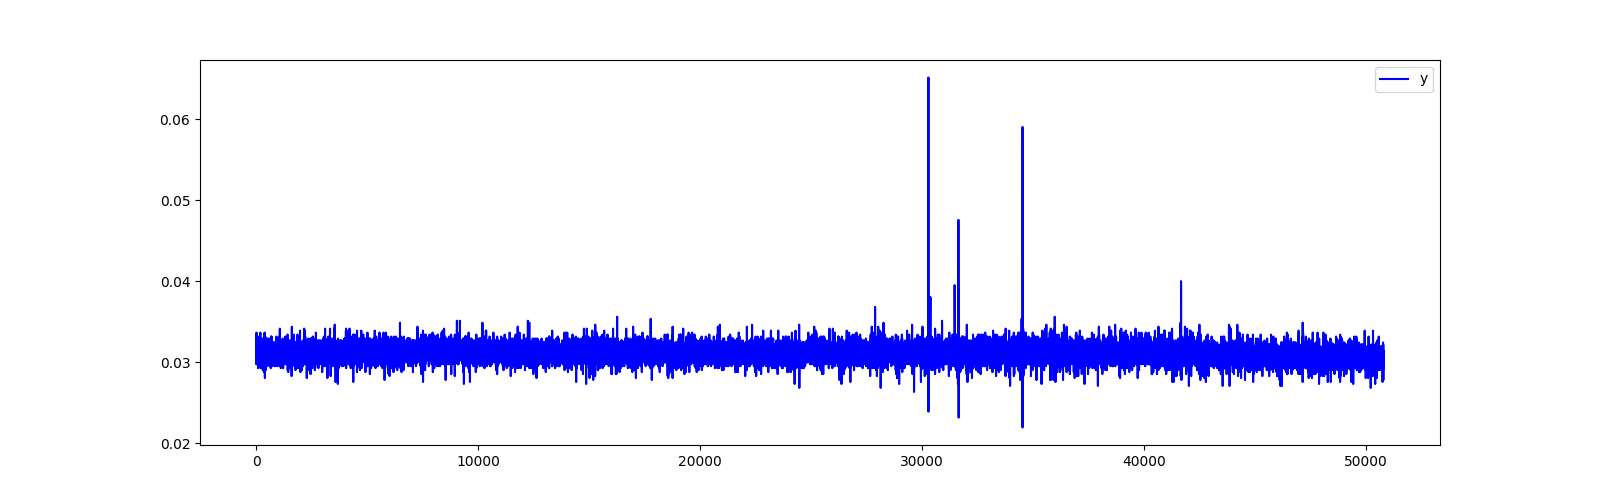

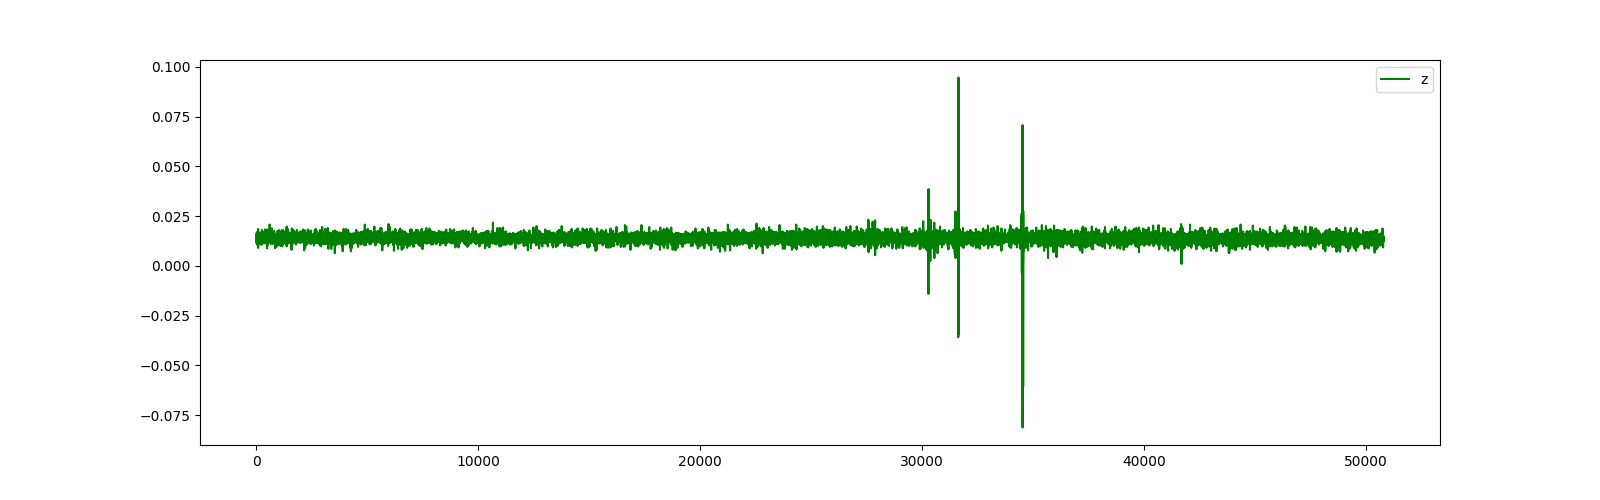

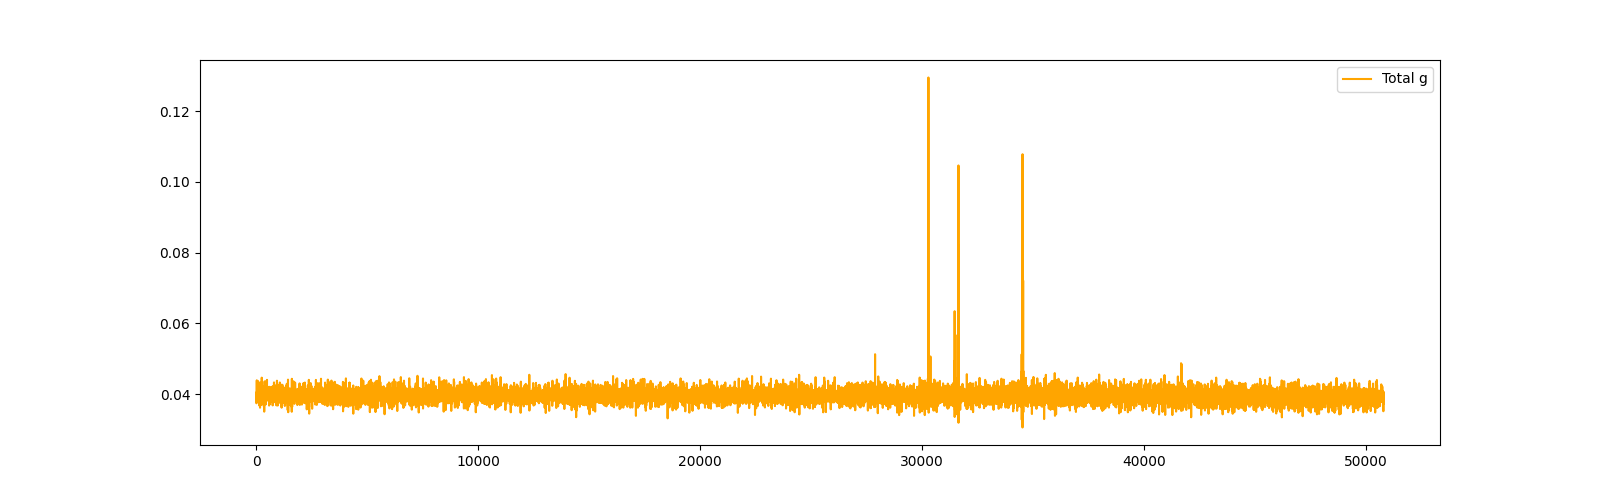

In [6]:
colors = ['red', 'blue', 'green', 'orange']
c = 0
for metrics in ['x', 'y', 'z', 'Total g']:
       legend = []
       legend.append(metrics.replace('_',''))
       fig, ax = plt.subplots()
       prova[metrics].plot(ax=ax, figsize=(16, 5), color=colors[c])
       ax.legend(legend)
       c = c + 1
       if c == 4:
              c = 0

In [7]:
def get_peaks(label, prova):
    meanValue = prova[label].mean()
    maxValue = prova[label].max()
    indexPeaks=prova.index[prova[label] > (meanValue+0.021)].tolist()

    print(len(indexPeaks))

    j=1
    i=0
    indexPeaksExtended={}

    for i in range(0, len(indexPeaks)):
        indexPeaksExtended[i] = []
        indexPeaksExtended[i].append(indexPeaks[i])
        for j in range(100):  
            indexPeaksExtended[i].append(indexPeaks[i]-j)
            indexPeaksExtended[i].append(indexPeaks[i]+j)
            
        indexPeaksExtended[i].sort()
        indexPeaksExtended[i] = list(set(indexPeaksExtended[i]))

    return indexPeaks, indexPeaksExtended


In [8]:
def plot_results(df_plot, color, label):
    plt.figure(figsize=(16, 5), dpi=80)
    ymax = df_plot[label].max()
    ymin = df_plot[label].min()
    for x in df_plot.index:
        if df_plot['Fastmode'][x] == True:
            plt.vlines(x=x, ymin=ymin, ymax=ymax, colors='black')
    for x in df_plot.index:
        if df_plot['MotionDetected'][x] == True:
            plt.vlines(x=x, ymin=ymin, ymax=ymax, colors='violet')
    plt.plot(df_plot.index, df_plot[label], color=color)
    plt.show()

def get_peaks_plots(index, label, prova, peaks = []):
    indexPeaks, indexPeaksExtended = get_peaks(label, prova)
    colors = ['red', 'blue', 'green', 'orange']
    c = 0
    if len(peaks) > 0:
        peaks_range = peaks
    else:
        peaks_range = range(0, len(indexPeaks))
    for i in peaks_range:
        plot_results(prova.iloc[indexPeaksExtended[i],[0,index,7,8]], colors[c], label)#.plot(kind='line', color=colors[c])
        c = c + 1
        if c == 4:
            c = 0

10


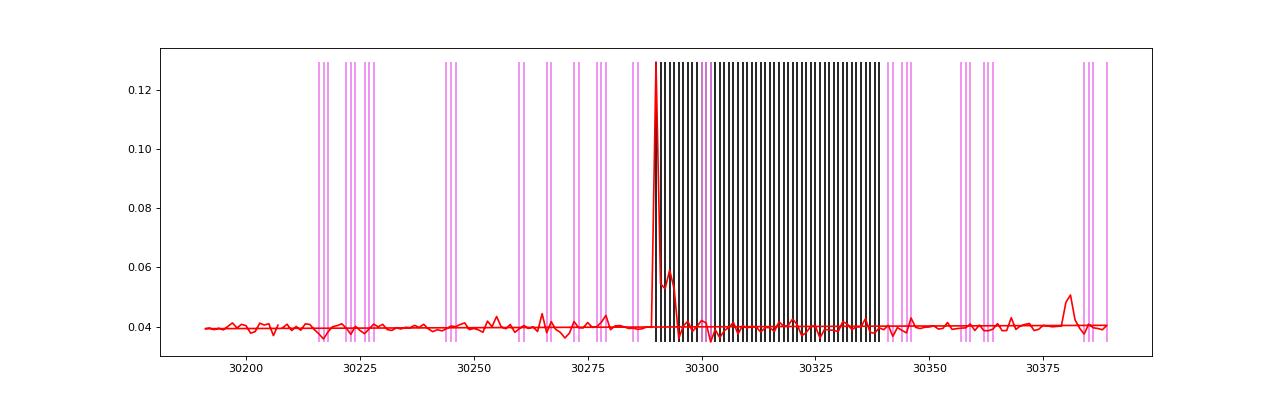

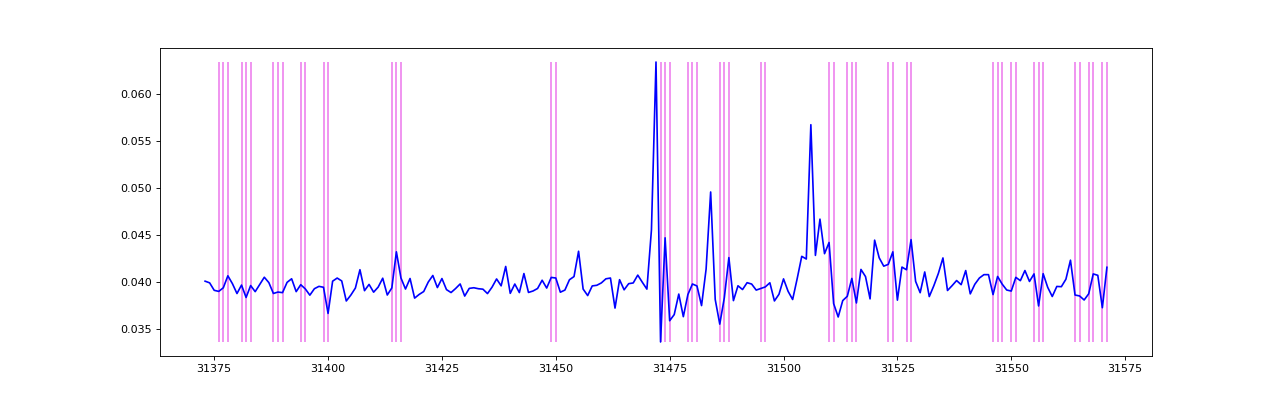

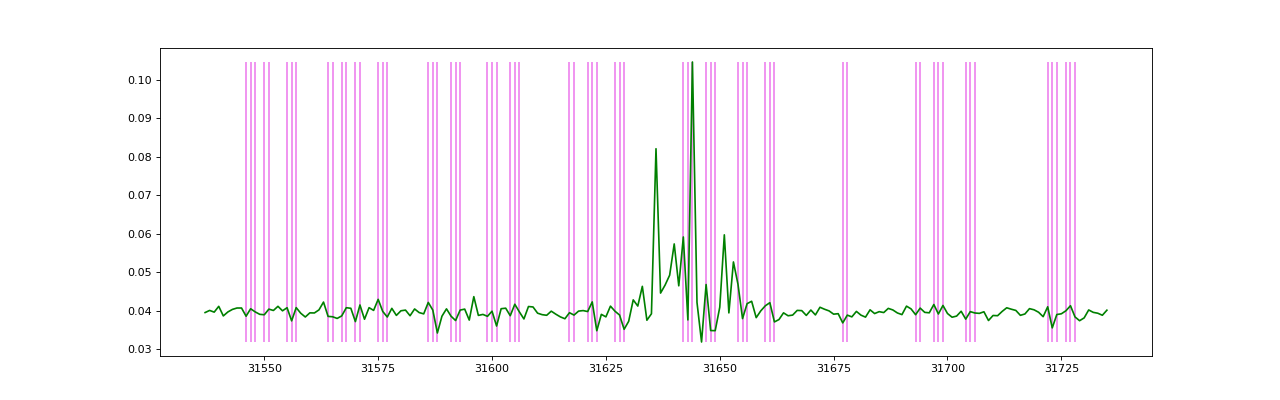

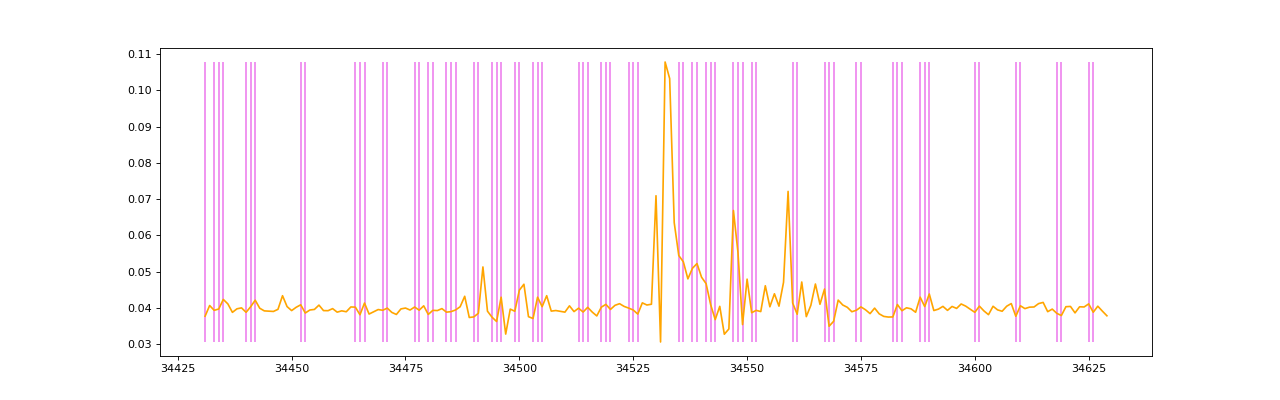

In [9]:
get_peaks_plots(4, 'Total g', prova, [0, 1, 2, 4])

8


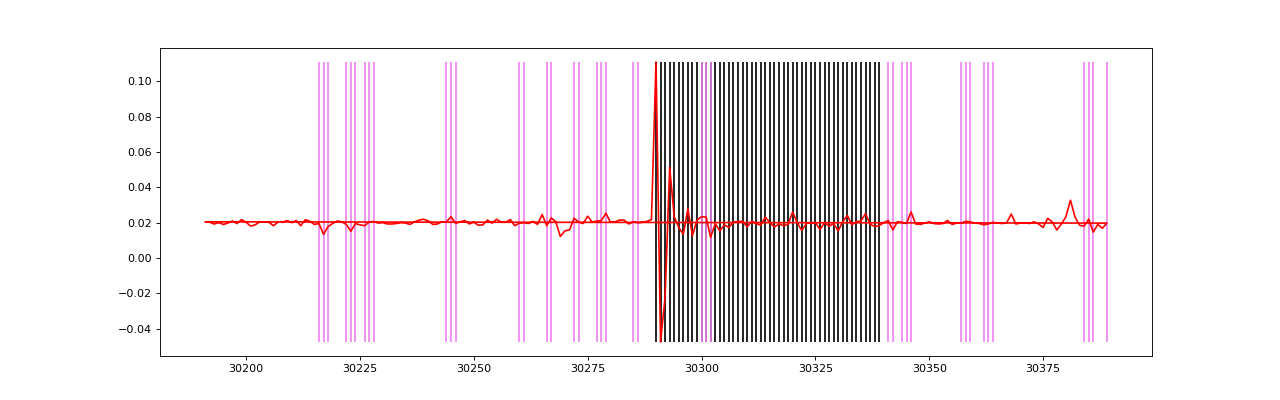

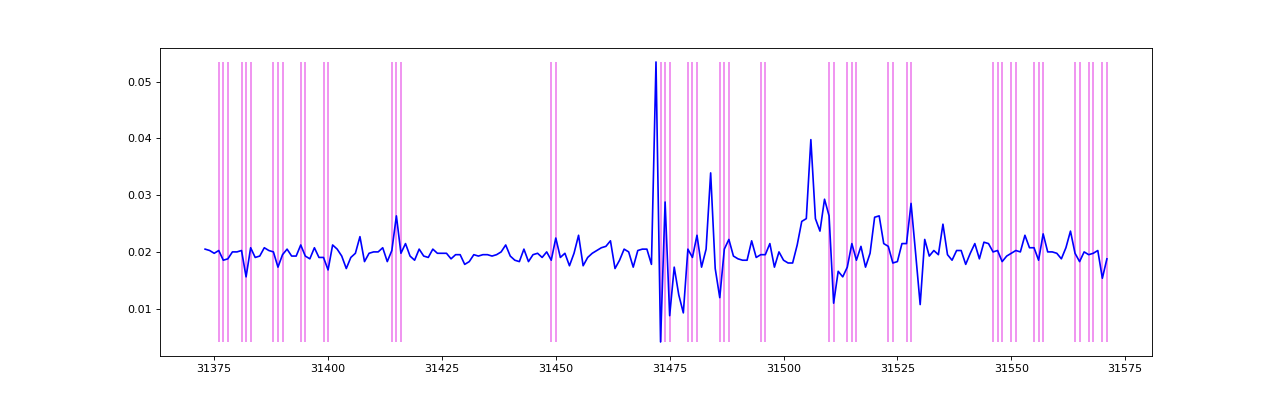

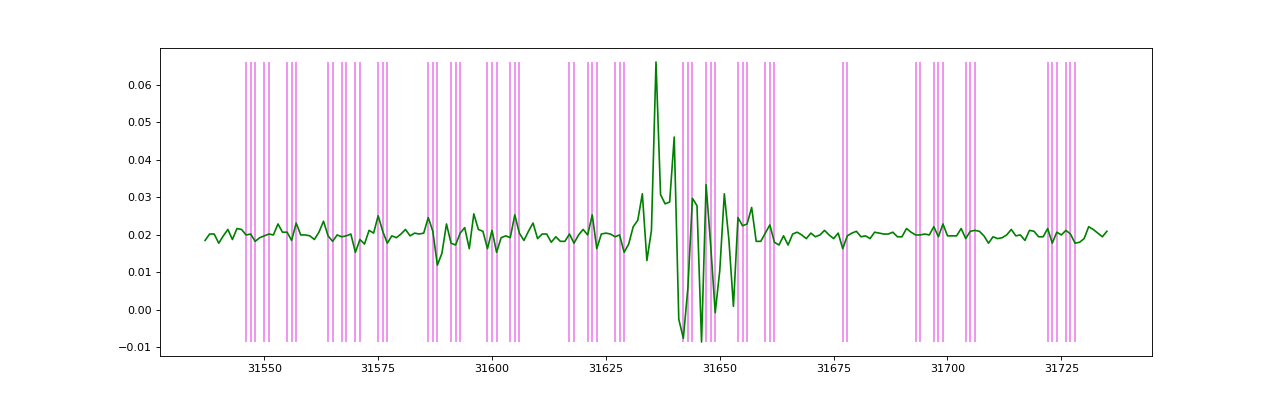

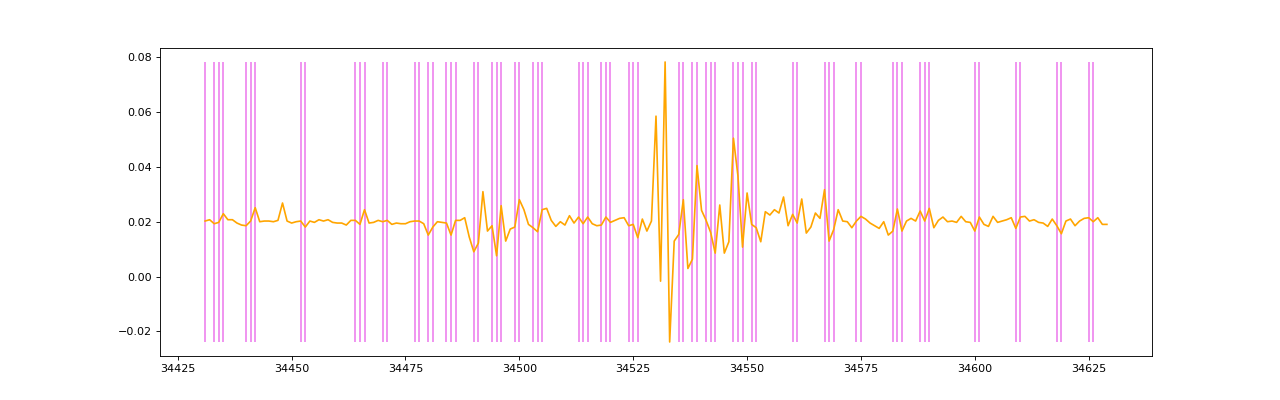

In [10]:
get_peaks_plots(1, 'x', prova, [0, 2, 3, 5])

2


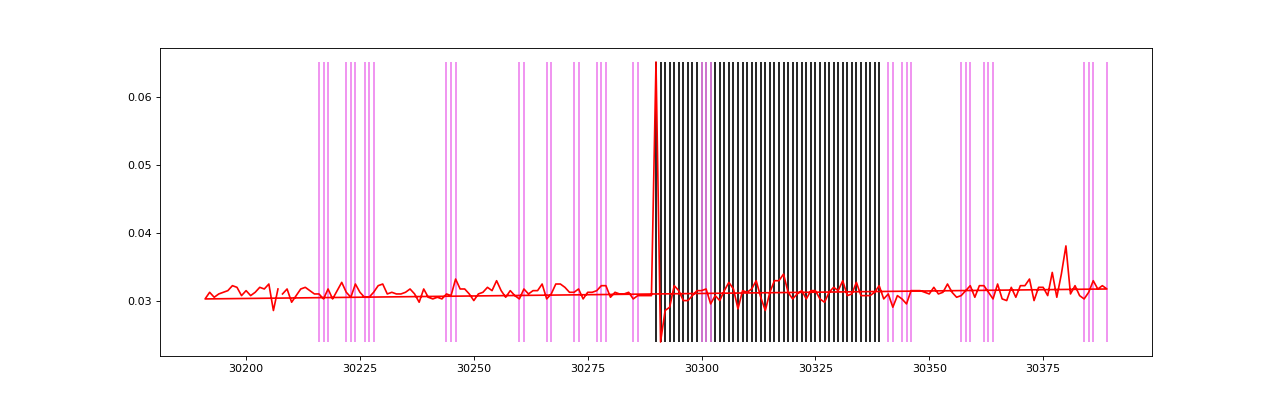

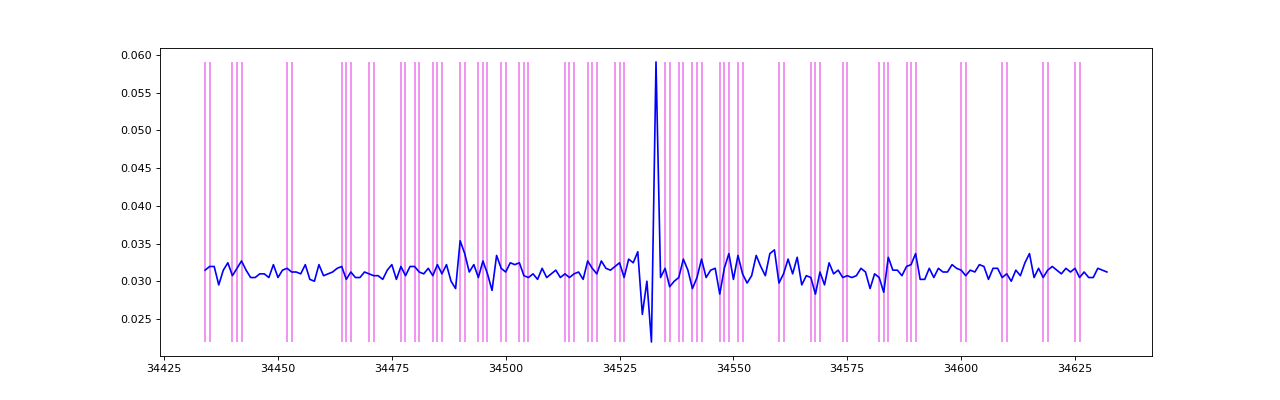

In [11]:
get_peaks_plots(2, 'y', prova)#, [0, 2, 3, 5])

9


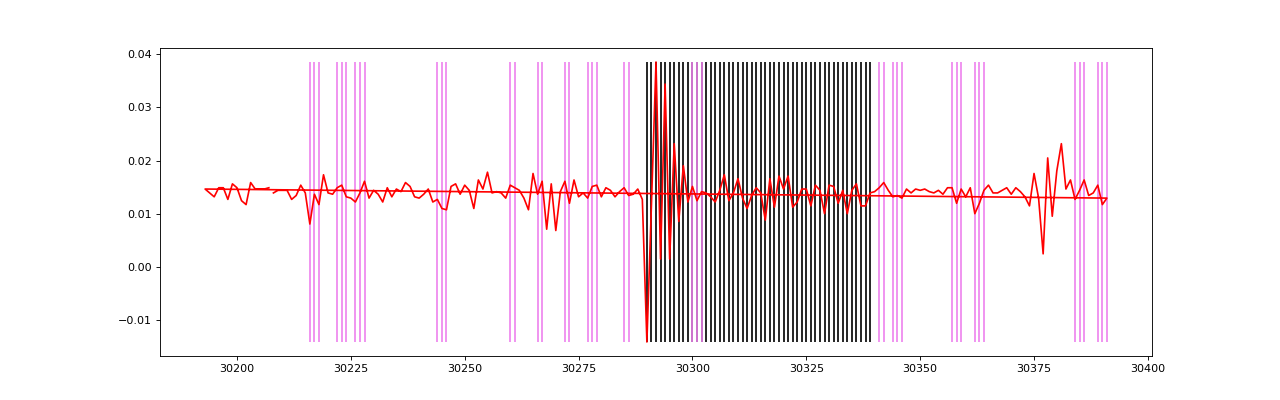

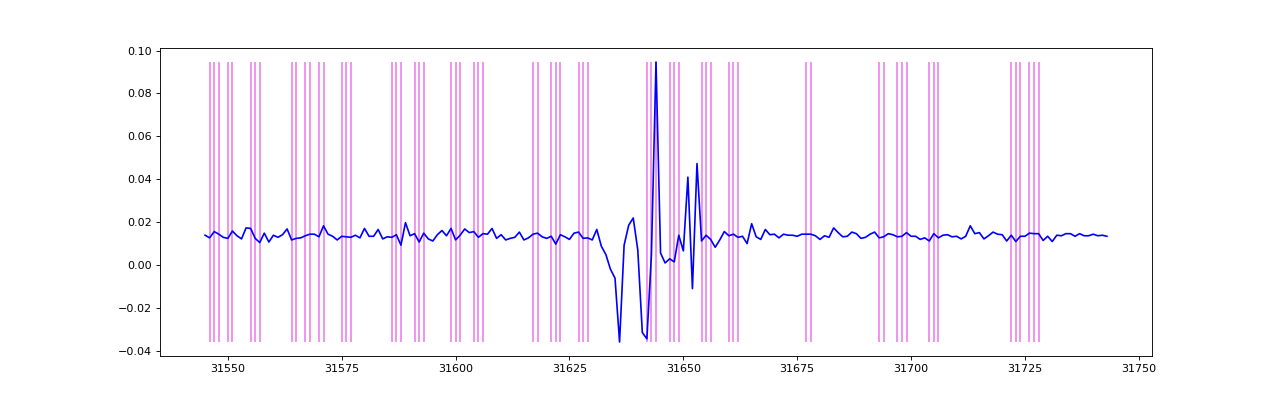

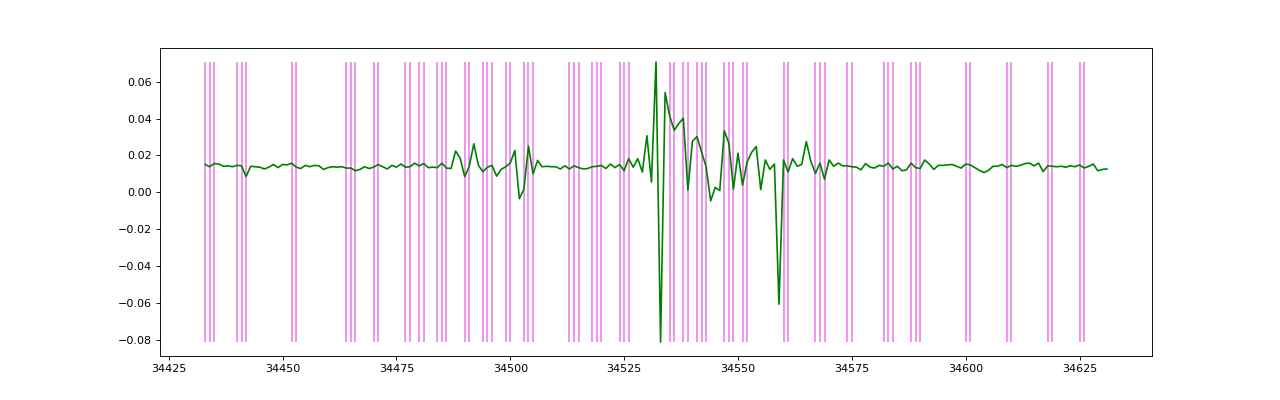

In [12]:
get_peaks_plots(3, 'z', prova, [0, 1, 4])

Text(0.5, 0.92, 'compass')

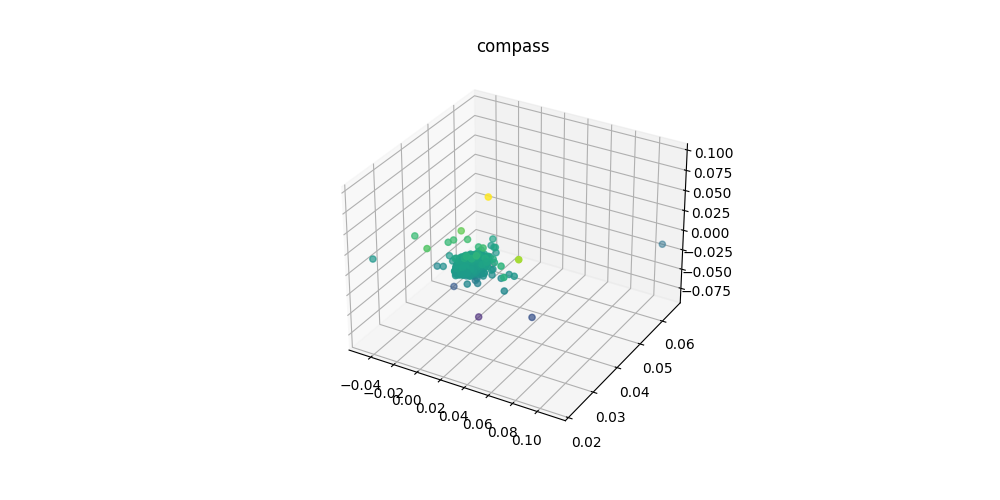

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')
ax.scatter3D(prova['x'], prova['y'], prova['z'], c=prova['z'], cmap='viridis');
plt.title('compass')